In [109]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Populating the interactive namespace from numpy and matplotlib


C:\Users\mathe\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [110]:
def binarySex(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [111]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [113]:
train['Sex_binario'] = train['Sex'].map(binarySex)
test['Sex_binario'] = test['Sex'].map(binarySex)

In [114]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

# Analise de Erros

In [115]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino,y_treino)
    
    p= modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print('Acc:',acc)
    print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [116]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [117]:
X_valid_check.shape

(445, 14)

In [118]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [119]:
Mulheres = erros[erros['Sex'] == 'female']
Homens = erros[erros['Sex'] == 'male']

In [120]:
Mulheres.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [121]:
Homens.sort_values('Survived')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


## Novas Variaveis

In [122]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# Train['Embarked_Q'] = (train[Enbarked] == 'Q').astype(int)

train['Cabine_Nula'] = train['Cabin'].isnull().astype(int)

train['Nome_Contains_Miss'] = train['Name'].str.contains('Miss').astype(int)
train['Nome_Contains_Mrs'] = train['Name'].str.contains('Msr').astype(int)

train['Nome_Contains_Master'] = train['Name'].str.contains('Master').astype(int)
train['Nome_Contains_Col'] = train['Name'].str.contains('Col').astype(int)
train['Nome_Contains_Major'] = train['Name'].str.contains('Major').astype(int)
train['Nome_Contains_Mr'] = train['Name'].str.contains('Mr').astype(int)

In [123]:
variaveis

['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [124]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare' , 'Embarked_S', 'Embarked_C', 'Cabine_Nula', 'Nome_Contains_Miss', 'Nome_Contains_Mrs', 'Nome_Contains_Master', 'Nome_Contains_Col','Nome_Contains_Major', 'Nome_Contains_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [125]:
resultados_novos = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
    modelo = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino,y_treino)
    
    p= modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    resultados_novos.append(acc)
    print('Acc:',acc)
    print()

Treino: 445
Valid: 446
Acc: 0.7645739910313901

Treino: 446
Valid: 445
Acc: 0.7865168539325843

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8094170403587444

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.804932735426009

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8228699551569507

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7802690582959642

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.7892376681614349

Treino: 446
Valid: 445
Acc: 0.797752808988764



((array([1., 0., 2., 2., 2., 2., 2., 4., 3., 2.]),
  array([0.76457399, 0.77040359, 0.77623318, 0.78206278, 0.78789238,
         0.79372197, 0.79955157, 0.80538117, 0.81121076, 0.81704036,
         0.82286996]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

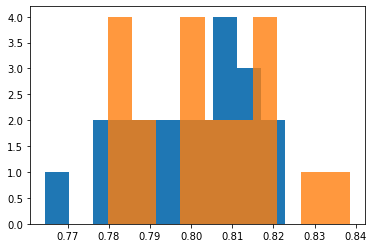

In [126]:
pylab.hist(resultados_novos), pylab.hist(resultados,alpha=0.8)

In [127]:
np.mean(resultados_novos)

0.7995470348163451

In [128]:
test['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# Train['Embarked_Q'] = (train[Enbarked] == 'Q').astype(int)

test['Cabine_Nula'] = train['Cabin'].isnull().astype(int)

test['Nome_Contains_Miss'] = train['Name'].str.contains('Miss').astype(int)
test['Nome_Contains_Mrs'] = train['Name'].str.contains('Msr').astype(int)

test['Nome_Contains_Master'] = train['Name'].str.contains('Master').astype(int)
test['Nome_Contains_Col'] = train['Name'].str.contains('Col').astype(int)
test['Nome_Contains_Major'] = train['Name'].str.contains('Major').astype(int)
test['Nome_Contains_Mr'] = train['Name'].str.contains('Mr').astype(int)

modelo = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

# Regressão Logistica

In [129]:
resultados_novos = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])
    
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    
#     modelo = RandomForestClassifier(n_estimators = 100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    modelo.fit(X_treino,y_treino)
    
    p= modelo.predict(X_valid)
    
    acc = np.mean(y_valid == p)
    resultados_novos.append(acc)
    print('Acc:',acc)
    print()

Treino: 445
Valid: 446
Acc: 0.8251121076233184

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.8134831460674158

Treino: 445
Valid: 446


C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.8071748878923767

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8228699551569507

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8251121076233184

Treino: 446
Valid: 445
Acc: 0.8112359550561797

Treino: 445
Valid: 446
Acc: 0.8363228699551569

Treino: 446
Valid: 445


C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8202247191011236

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8224719101123595



C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

((array([1., 1., 4., 2., 2., 3., 2., 3., 1., 1.]),
  array([0.79775281, 0.80160982, 0.80546682, 0.80932383, 0.81318083,
         0.81703784, 0.82089485, 0.82475185, 0.82860886, 0.83246586,
         0.83632287]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

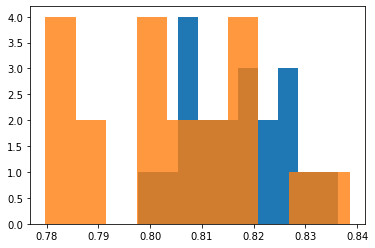

In [130]:
pylab.hist(resultados_novos), pylab.hist(resultados,alpha=0.8)

In [131]:
np.mean(resultados_novos)

0.8167166322366102

In [132]:
test['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
# Train['Embarked_Q'] = (train[Enbarked] == 'Q').astype(int)

test['Cabine_Nula'] = train['Cabin'].isnull().astype(int)

test['Nome_Contains_Miss'] = train['Name'].str.contains('Miss').astype(int)
test['Nome_Contains_Mrs'] = train['Name'].str.contains('Msr').astype(int)

test['Nome_Contains_Master'] = train['Name'].str.contains('Master').astype(int)
test['Nome_Contains_Col'] = train['Name'].str.contains('Col').astype(int)
test['Nome_Contains_Major'] = train['Name'].str.contains('Major').astype(int)
test['Nome_Contains_Mr'] = train['Name'].str.contains('Mr').astype(int)

modelo = LogisticRegression()
modelo.fit(X,y)

p = modelo.predict(test[variaveis].fillna(-1))

C:\Users\mathe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Criar Submission

In [133]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [134]:
sub.to_csv('modelo_final.csv', header=True)